# Import Data

In [242]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Analysis and Cleaning

Import the data:

In [243]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

Analyze the data:

In [244]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [246]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [247]:
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [248]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Intuition: There are 891 entries for 12 features, i.e., training examples however,
    there are some null elements.
    Cabin has the highest null elements, so it can't be used to provide an indepth understanding on the data
    Therefore, we will drop the feature cabin in this case.
    The training examples under the feature age is important therefore, the examples devoid of age will be dropped.

In [249]:
df = train_data

In [250]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [251]:
df1 = df.drop(['Cabin'], axis=1)
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

The cabin feature has been dropped.
Now, to remove the training examples that are null against the age

In [252]:
df1.dropna(inplace=True, axis=0, how='any', ignore_index=False)

In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


Now, no feature has null values. 
Next, to make sure that only the features that are relevant exist:

In [254]:
df2 = df1.copy()

In [255]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [256]:
df2.drop(['Name', 'Embarked'], axis=1, inplace=True)

In [257]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [258]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


Now there are 8 features and 712 training examples

In [259]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,female,38.0,1,0,PC 17599,71.2833
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,female,35.0,1,0,113803,53.1000
4,5,0,3,male,35.0,0,0,373450,8.0500


Study the dtypes of the data:

In [260]:
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [261]:
'''Analyze whether sex has any values other than male female:'''
print(df2.Sex.unique())

['male' 'female']


In [262]:
df3 = df2.copy()

In [263]:
'''Replace male,female by 0,1'''
df3['Sex'] = df3['Sex'].replace(['male','female'],[0,1])
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,1,38.0,1,0,PC 17599,71.2833
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,1,35.0,1,0,113803,53.1000
4,5,0,3,0,35.0,0,0,373450,8.0500


In [264]:
df4 = df3.copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 55.6+ KB


In [265]:
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,1,38.0,1,0,PC 17599,71.2833
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,1,35.0,1,0,113803,53.1000
4,5,0,3,0,35.0,0,0,373450,8.0500


In [266]:
'''Work with the Ticket feature
Here, we will split this feature into strings and numbers
'''

def ticket_number(x):
     return x.split(" ")[-1]
def ticket_item(x):
    items = x.split(" ")
    if len(items) == 1:
        return "NONE"
    return "_".join(items[0:-1])

df4['Ticket_number']=df4['Ticket'].apply(ticket_number)
df4['Ticket_item']=df4['Ticket'].apply(ticket_item)

df4.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Ticket_number', 'Ticket_item'],
      dtype='object')

In [267]:
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Ticket_number,Ticket_item
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,21171,A/5
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,17599,PC
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,3101282,STON/O2.
3,4,1,1,1,35.0,1,0,113803,53.1000,113803,NONE
4,5,0,3,0,35.0,0,0,373450,8.0500,373450,NONE


In [268]:
df4['Ticket_item'].unique()

array(['A/5', 'PC', 'STON/O2.', 'NONE', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C', 'W./C.',
       'W.E.P.', 'STON/O_2.', 'C', 'SOTON/O.Q.', 'SC/PARIS', 'S.O.P.',
       'A.5.', 'SOTON/OQ', 'F.C.C.', 'W/C', 'SW/PP', 'SCO/W', 'P/PP',
       'SC', 'SC/AH', 'SC/AH_Basle', 'A/4', 'WE/P', 'S.W./PP', 'CA.',
       'F.C.', 'SOTON/O2', 'S.O./P.P.', 'S.C./PARIS', 'C.A./SOTON'],
      dtype=object)

But the tickets are more related with the fare... so, let's just drop the tickets feature...


In [269]:
df5 = df4.drop(['Ticket','Ticket_item','Ticket_number'],axis='columns')

In [270]:
df5.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


Now, let's bring back the feature for embarked instead

In [271]:
embarked_series = df['Embarked']

In [272]:
embarked_series.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [273]:
df6 = df5.copy()
df6=df6.join(embarked_series)
df6.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


Now, let's check whether all the dtypes are float and int

In [274]:
df6.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

We need to convert the remaining object type into int or float...
We can do that in a multitude of ways.
But let's use one hot encoding for this one!

In [275]:
print(df6.Embarked.unique())

['S' 'C' 'Q']


In [276]:
embarked_series=df6['Embarked']
embarked_df=pd.get_dummies(embarked_series, dtype=float)
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [277]:
df7 = df6.copy()
df7=df7.join(embarked_df)

Now, let's drop the Embarked series.

In [278]:
df8 = df7.copy()
df8.drop(['Embarked'],axis=1,inplace=True)
df8.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,1,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,0,35.0,0,0,8.0500,0.0,0.0,1.0


In [279]:
df8.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
C              float64
Q              float64
S              float64
dtype: object

Now, we are done with Data Cleaning and Data Wrangling..
We donot have to deal with outliers in this dataset, as this is clearly a
Classification Problem.
For the said reason, we will not be using the Linear Regression Algorithm here as well.
So, let's get on with it.

# Data Visualization

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

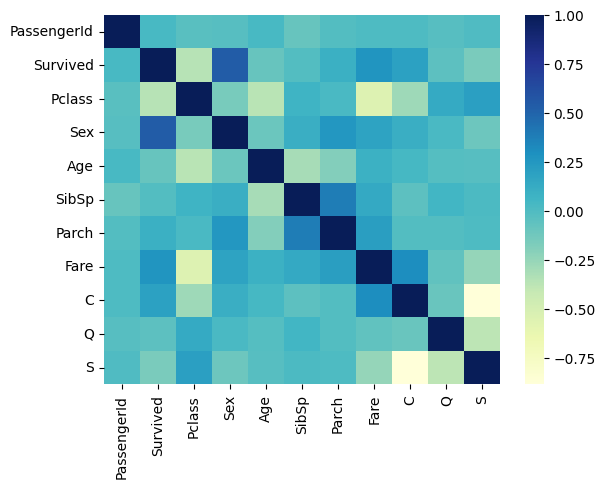

In [281]:
sns.heatmap(df8.corr(), cmap="YlGnBu")

In [282]:
df8.corr(method="kendall")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,0.024470,-0.027339,-0.019677,0.026580,-0.052004,-0.004463,-0.013347,0.006619,-0.021802,0.004044
Survived,0.024470,1.000000,-0.339258,0.536762,-0.047073,0.073220,0.153273,0.276035,0.195673,-0.048966,-0.159015
Pclass,-0.027339,-0.339258,1.000000,-0.147100,-0.283531,-0.049373,-0.019205,-0.610439,-0.246504,0.130109,0.168319
Sex,-0.019677,0.536762,-0.147100,1.000000,-0.072974,0.162323,0.248628,0.222917,0.103611,0.027256,-0.109078
Age,0.026580,-0.047073,-0.283531,-0.072974,1.000000,-0.141352,-0.199266,0.090344,0.023257,-0.027706,-0.008662
SibSp,-0.052004,0.073220,-0.049373,0.162323,-0.141352,1.000000,0.400447,0.340215,0.020980,-0.005696,-0.016842
Parch,-0.004463,0.153273,-0.019205,0.248628,-0.199266,0.400447,1.000000,0.329494,0.026884,-0.015919,-0.017548
Fare,-0.013347,0.276035,-0.610439,0.222917,0.090344,0.340215,0.329494,1.000000,0.214356,-0.104391,-0.150460
C,0.006619,0.195673,-0.246504,0.103611,0.023257,0.020980,0.026884,0.214356,1.000000,-0.095623,-0.884986
Q,-0.021802,-0.048966,0.130109,0.027256,-0.027706,-0.005696,-0.015919,-0.104391,-0.095623,1.000000,-0.378859


What can be seen from the heatmap:
The survived feature has:
- Very low postitive correlation with the passenger ID
- Strong correlation with itself
- Negative correlation with the passenger class (>-0.50)
- Strong Positive correlation with the sex (>0.75)
- Very low negative correlation with the age feature
- Very low positive correlation with the SibSp feature
- Low positive correlation with the Parents and Children feature
- Positive correlation with the fare feature
- Low Positive correlation with the C feature
- Very low negative correlation with the Q feature
- Negative correlation with the S feature

Let's visualize further!

In [283]:
df9 = df8.copy()
df9.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,1,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,0,35.0,0,0,8.0500,0.0,0.0,1.0


In [284]:
df9.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'C', 'Q', 'S'],
      dtype='object')

In [285]:
df9.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,0.182584,0.039326,0.778090
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.386597,0.194506,0.415823
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,1.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [286]:
df10=df9[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)
df10

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


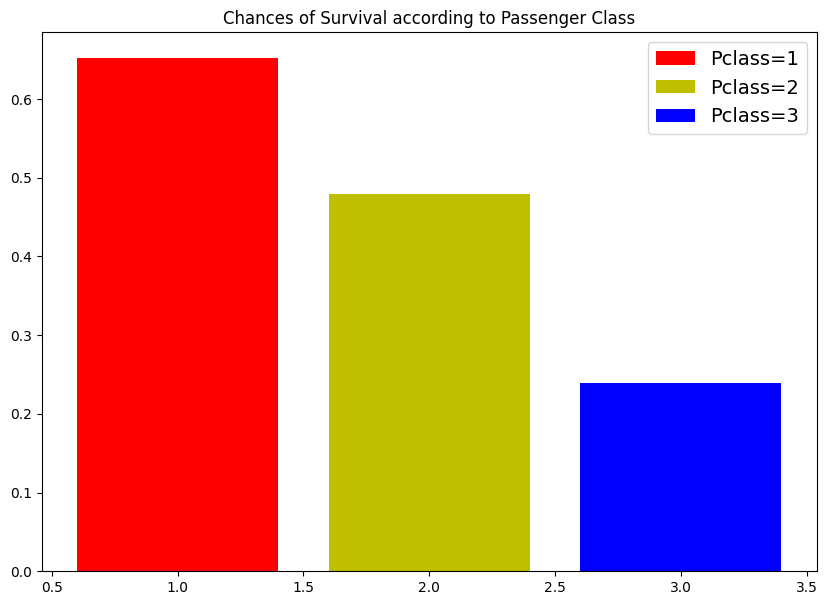

In [287]:
plt.figure(figsize=(10,7))
plt.bar(df10.Pclass[0], df10.Survived[0], color='r', label="Pclass=1")
plt.bar(df10.Pclass[1], df10.Survived[1], color='y',label="Pclass=2")
plt.bar(df10.Pclass[2], df10.Survived[2], color='b', label="Pclass=3")
plt.title('Chances of Survival according to Passenger Class')
plt.legend(prop={'size':14})

In [288]:
df11=df9[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
df11    

,Sex,Survived
1,1,0.752896
0,0,0.205298


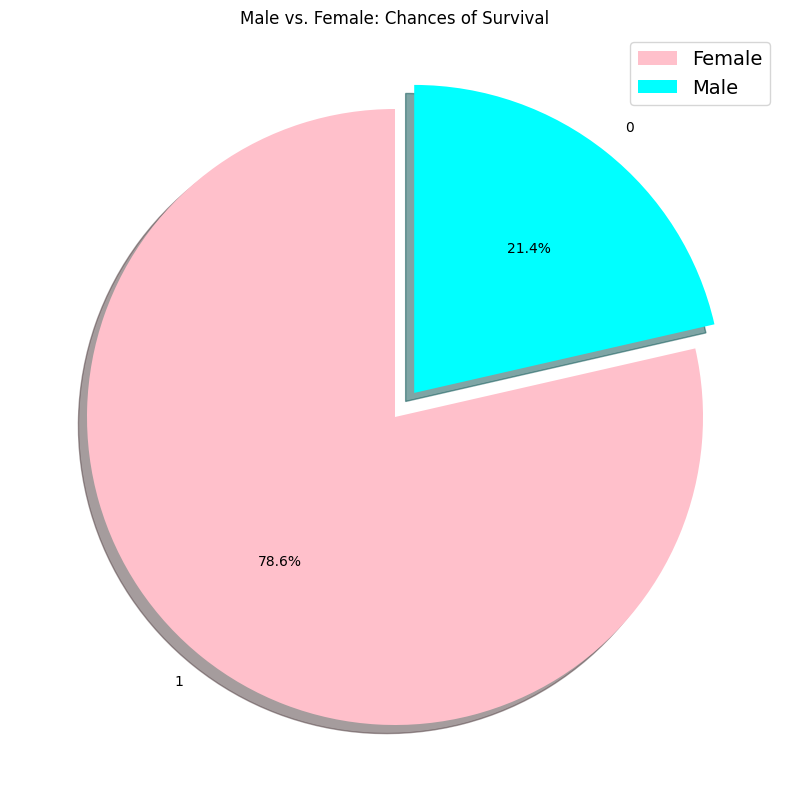

In [289]:
explode = (0, 0.1)
plt.figure(figsize=(10,10))
plt.pie(df11.Survived, labels=df11.Sex, autopct='%1.1f%%',
      explode=explode, shadow=True, startangle=90,
       colors=['pink','cyan'])
plt.title('Male vs. Female: Chances of Survival')
plt.legend(prop = {'size':14}, labels=['Female', 'Male'])


In [290]:
df12=df9[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Survived',ascending=False)
df12

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


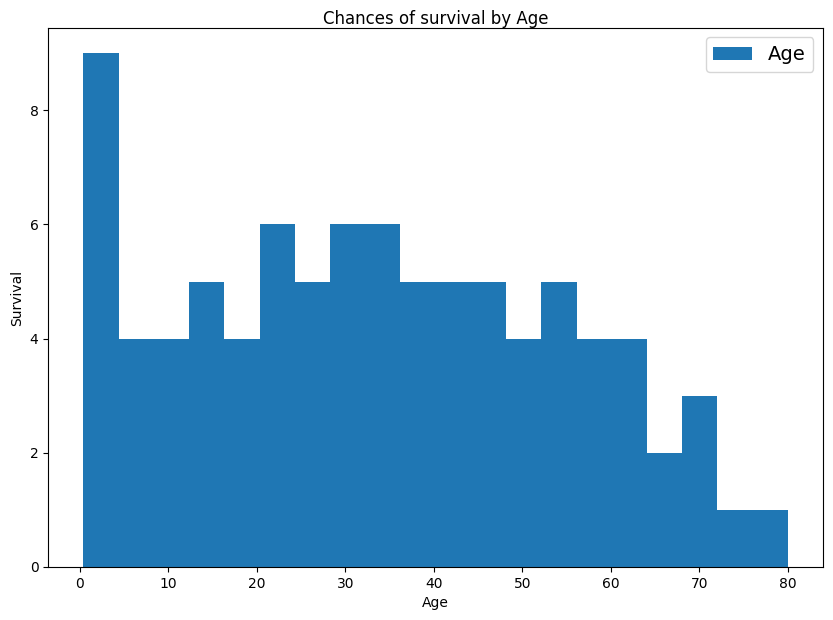

In [291]:
plt.figure(figsize=(10,7))
plt.hist(df12['Age'], bins=20, density=False, label='Age')
plt.title(label='Chances of survival by Age', pad=True, fontdict=None)
plt.xlabel('Age')
plt.ylabel('Survival')
plt.legend(prop={'size':14})

In [292]:
df13=df9[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
df13

,SibSp,Survived
1,1,0.530055
2,2,0.440000
0,0,0.368870
3,3,0.333333
4,4,0.166667
5,5,0.000000


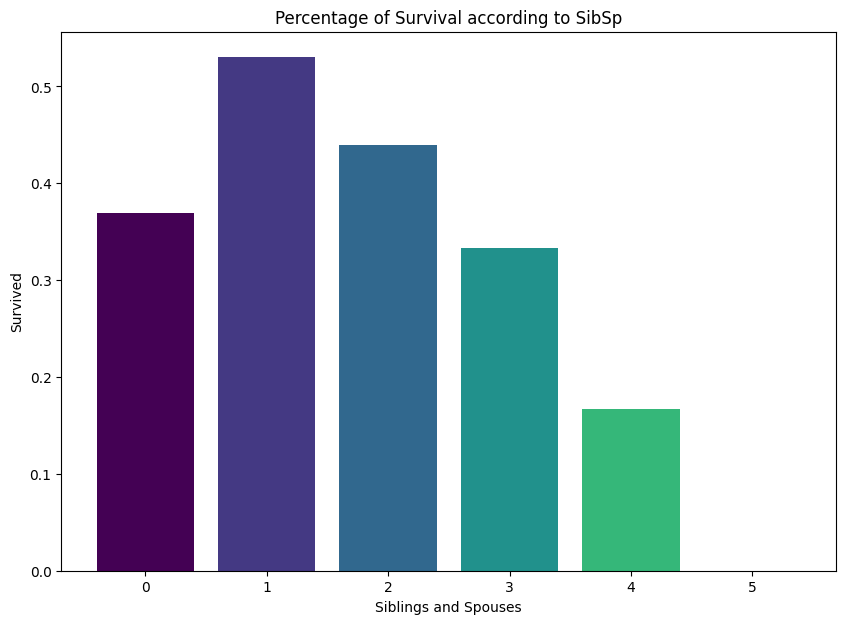

In [293]:
from matplotlib import cm
x = df13.SibSp
y = df13.Survived
plt.figure(figsize=(10,7))
for i in range(0, len(x)):
    plt.bar(x[i], y[i], color=cm.viridis(1.*i/len(x)))
    plt.xlabel('Siblings and Spouses')
    plt.ylabel('Survived')
    plt.title('Percentage of Survival according to SibSp')
plt.show()

In [294]:
df14 = df9[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=True)
df14

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.354528
1,1,0.554545
2,2,0.573529
3,3,0.600000


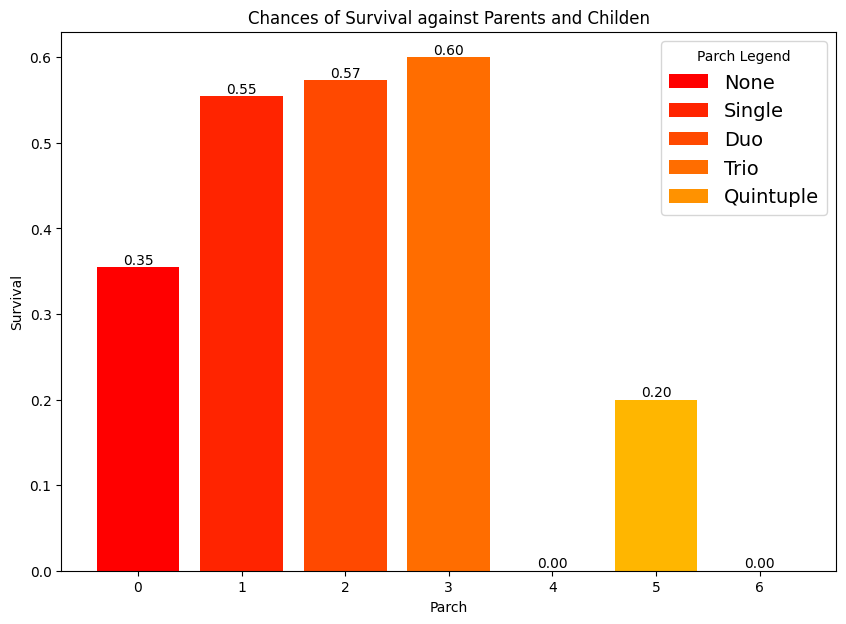

In [295]:
fig, ax = plt.subplots(figsize=(10,7))
x = df14.Parch
y = df14.Survived

for i in range(0, len(x)):
    bar_container=ax.bar(x[i], y[i], color=cm.autumn(1.*i/len(x)))
    ax.bar_label(bar_container, fmt='{:,.2f}')
    
ax.set_title('Chances of Survival against Parents and Childen')
ax.set(ylabel='Survival', xlabel='Parch')
ax.legend(prop={'size':14}, title="Parch Legend", labels=['None','Single','Duo','Trio','Quintuple'])

In [296]:
df15 = df9[['Fare','Survived']].groupby(['Fare'],as_index=False).mean().sort_values(by='Survived',ascending=False)
df15

,Fare,Survived
218,512.3292,1.0
162,52.5542,1.0
168,56.9292,1.0
184,76.7292,1.0
186,77.9583,1.0
...,...,...
93,16.1000,0.0
160,51.8625,0.0
96,17.8000,0.0
158,50.4958,0.0


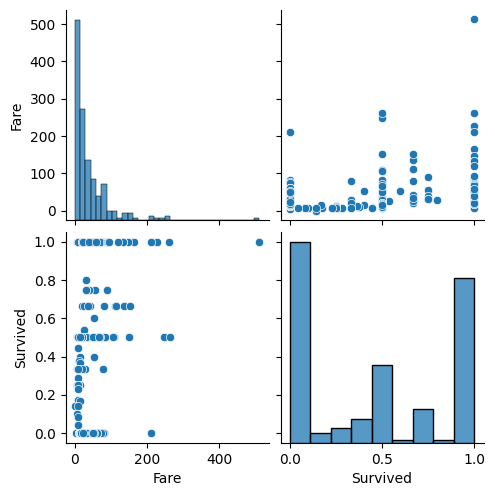

In [297]:
sns.pairplot(df15)


<Axes: xlabel='Fare', ylabel='Survived'>

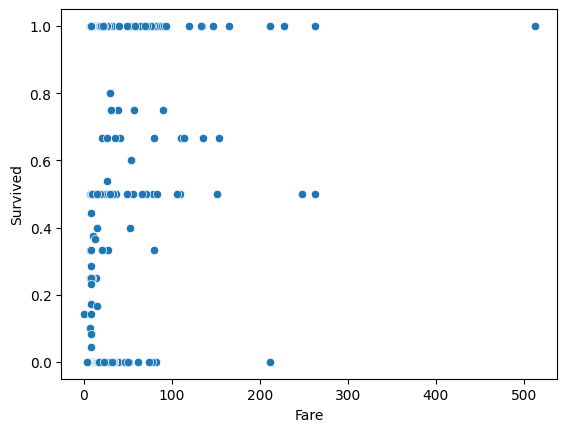

In [298]:
sns.scatterplot(df15, x=df15.Fare, y=df15.Survived)

<Axes: xlabel='Fare', ylabel='Count'>

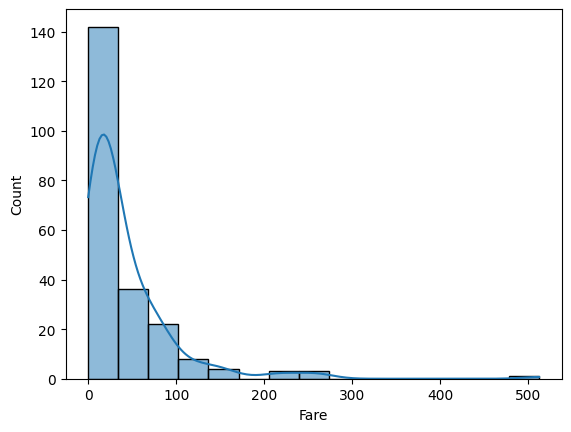

In [299]:
sns.histplot(df15, x=df15.Fare, alpha=0.5, bins=15, kde=True)

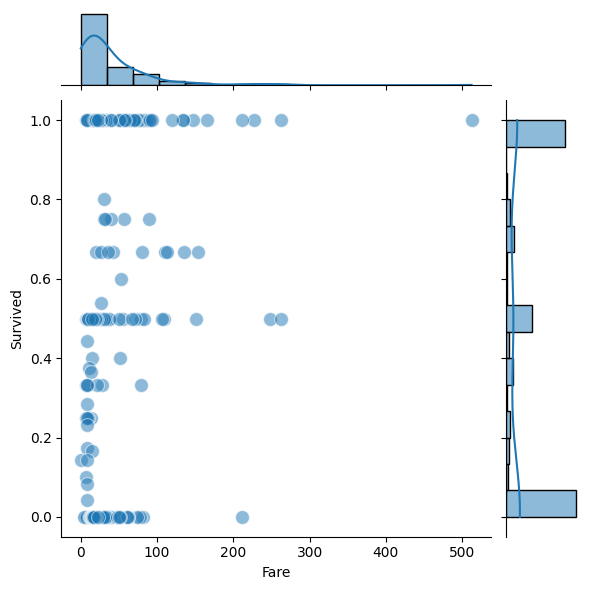

In [300]:
g = sns.JointGrid(data=df15, x=df15.Fare, y=df15.Survived)
g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
g.plot_marginals(sns.histplot, alpha=0.5, bins=15,kde=True)

In [301]:
df16 = df9[['Q','Survived']].groupby(['Q'],as_index=False).mean().sort_values(by='Survived',ascending=False)
df16

,Q,Survived
0,0.0,0.409357
1,1.0,0.285714


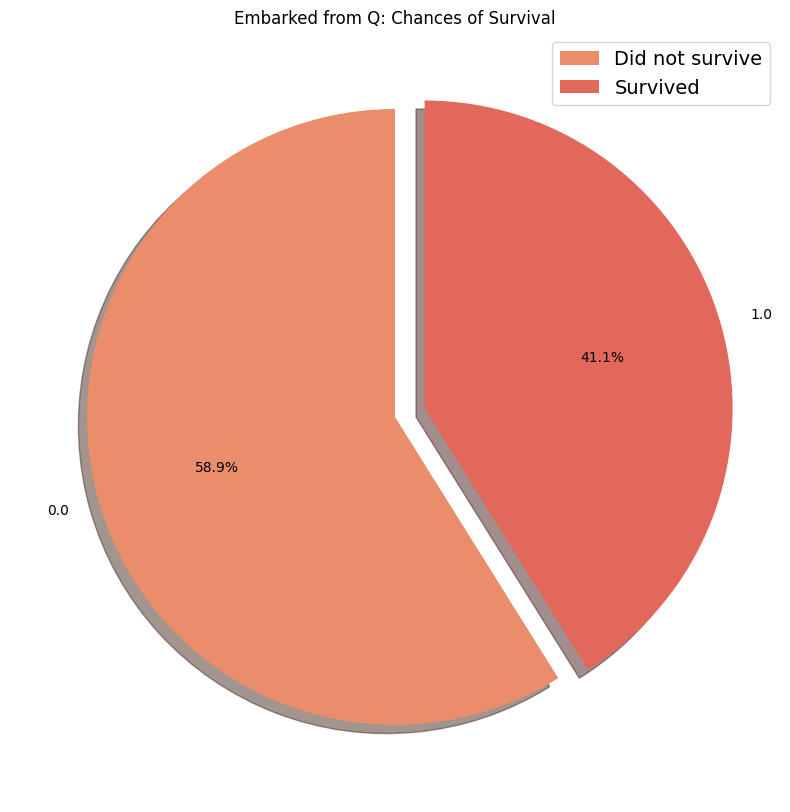

In [316]:
explode = (0, 0.1)
colors = sns.color_palette('flare')
plt.figure(figsize=(10,10))
plt.pie(df16.Survived, labels=df16.Q, autopct='%1.1f%%',
      explode=explode, shadow=True, startangle=90,
       colors=colors)
plt.title('Embarked from Q: Chances of Survival')
plt.legend(prop = {'size':14}, labels=['Did not survive', 'Survived'])

In [302]:
df17 = df9[['S','Survived']].groupby(['S'],as_index=False).mean().sort_values(by="Survived",ascending=False)
df17

,S,Survived
0,0.0,0.550633
1,1.0,0.362816


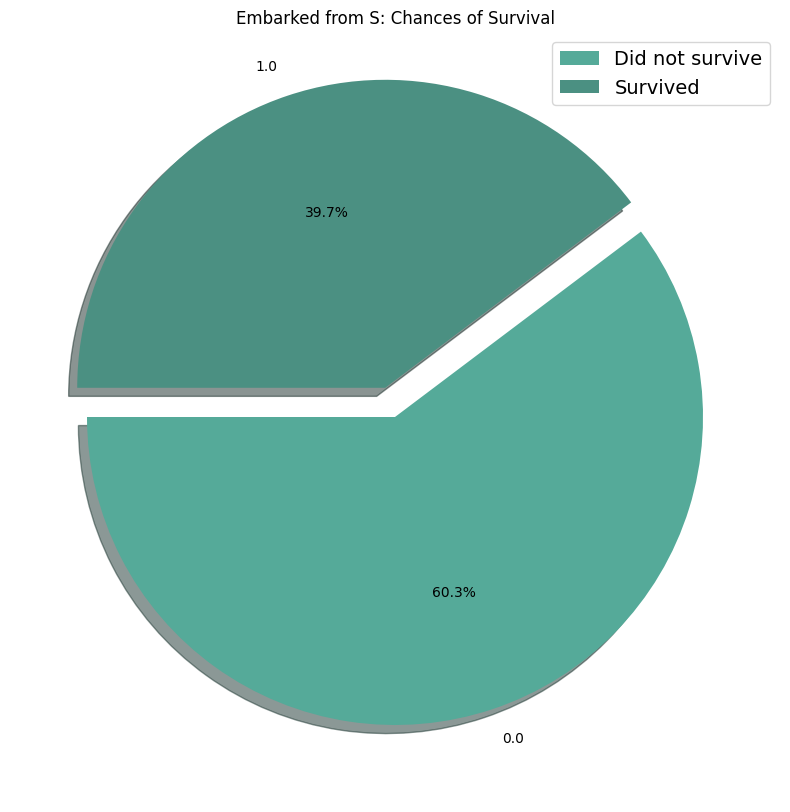

In [323]:
explode = (0, 0.1)
colors = sns.color_palette('dark:#5A9_r')
plt.figure(figsize=(10,10))
plt.pie(df17.Survived, labels=df17.S, autopct='%1.1f%%',
      explode=explode, shadow=True, startangle=180,
       colors=colors)
plt.title('Embarked from S: Chances of Survival')
plt.legend(prop = {'size':14}, labels=['Did not survive', 'Survived'])

In [303]:
df18 = df9[['C','Survived']].groupby(['C'],as_index=False).mean().sort_values(by="Survived",ascending=False)
df18

,C,Survived
1,1.0,0.607692
0,0.0,0.359107


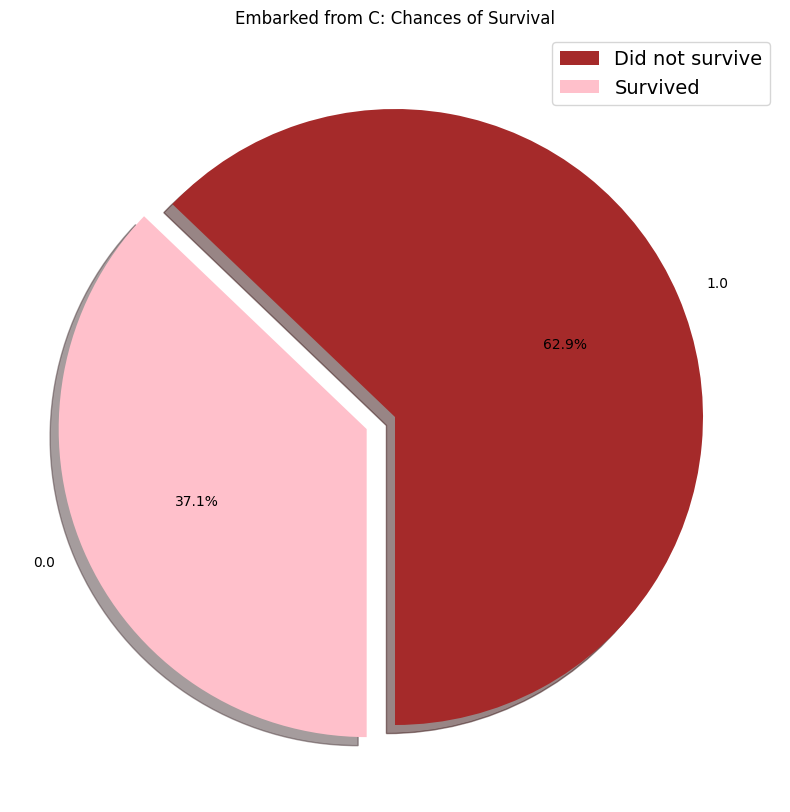

In [322]:
explode = (0, 0.1)
colors = sns.color_palette('flare', as_cmap=True)
plt.figure(figsize=(10,10))
plt.pie(df18.Survived, labels=df18.C, autopct='%1.1f%%',
      explode=explode, shadow=True, startangle=270,
       colors=['brown','pink'])
plt.title('Embarked from C: Chances of Survival')
plt.legend(prop = {'size':14}, labels=['Did not survive', 'Survived'])

In [328]:
df9.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'C', 'Q', 'S'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warnin

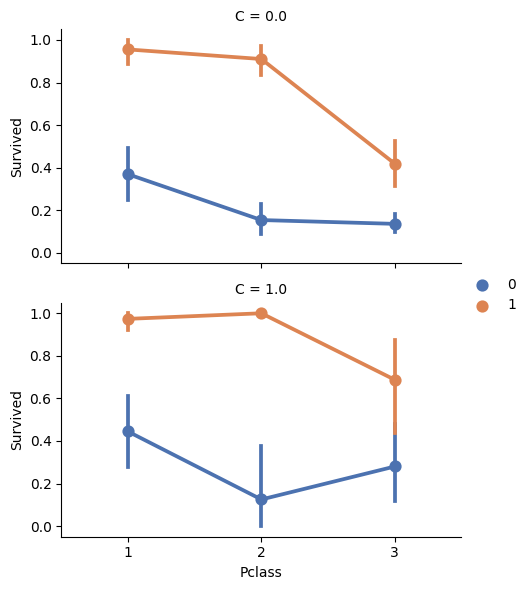

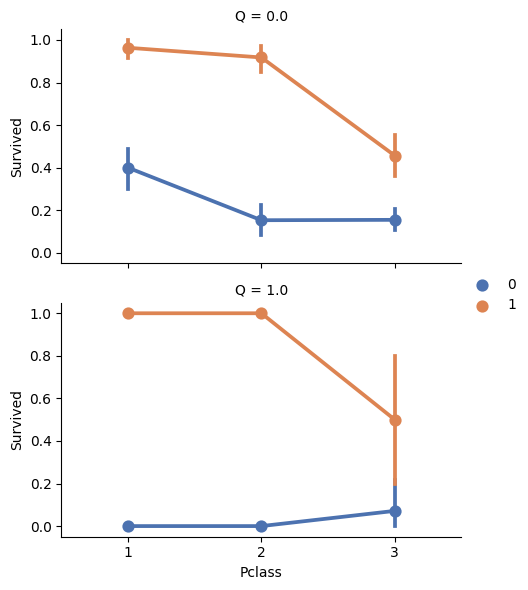

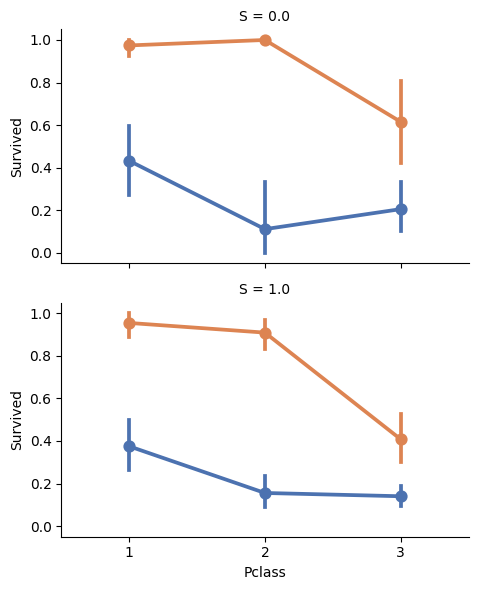

In [331]:
grid0 = sns.FacetGrid(df9, row='C', height=3, aspect=1.6)
grid0.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid0.add_legend()
grid1 = sns.FacetGrid(df9, row='Q', height=3, aspect=1.6)
grid1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid1.add_legend()
grid2 = sns.FacetGrid(df9, row='S', height=3, aspect=1.6)
grid2.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid2.add_legend()


So, the relations have been visualized,
time to perform some predictions

# Machine Learning Section:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Gaussian Process Classifier
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [337]:
df10 = df9.copy()
print(df10.shape)
df10.head()

(712, 11)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,1,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,0,35.0,0,0,8.0500,0.0,0.0,1.0


In [357]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [398]:
X_train = df10.drop('Survived', axis=1)
Y_train = df10["Survived"]
X_test  = test_data.drop(["Name","Cabin","Ticket"], axis=1).copy()
X_dummies = pd.get_dummies(X_test.Embarked)
X_test = X_test.drop(["Embarked"], axis=1)
X_test = X_test.join(X_dummies)
X_test['Sex'] = X_test['Sex'].replace(['male','female'],[0,1])
X_train.shape, Y_train.shape, X_test.shape

((712, 10), (712,), (418, 10))

In [399]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,3,0,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,3,1,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,3,0,35.0,0,0,8.0500,0.0,0.0,1.0


In [400]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,0,34.5,0,0,7.8292,False,True,False
1,893,3,1,47.0,1,0,7.0000,False,False,True
2,894,2,0,62.0,0,0,9.6875,False,True,False
3,895,3,0,27.0,0,0,8.6625,False,False,True
4,896,3,1,22.0,1,1,12.2875,False,False,True


In [419]:
print(f'''Unique values in Age: {X_test['Age'].unique()}, \n
        Unique values in SibSp: {X_test.SibSp.unique()}, \n
        Unique values in Parch: {X_test.Parch.unique()}, \n
        Unique values in Fare: {X_test.Fare.unique()}
        ''')

Unique values in Age: [34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54.   64.   37.   34.
 11.5   8.    0.33 38.   57.   40.5   0.92 19.   36.5   0.75  0.83 58.
  0.17 59.   14.5  44.    5.   51.    3.   38.5 ], 

        Unique values in SibSp: [0 1 2 3 4 5 8], 

        Unique values in Parch: [0 1 3 2 4 6 5 9], 

        Unique values in Fare: [  7.8292   7.       9.6875   8.6625  12.2875   9.225    7.6292  29.
   7.2292  24.15     7.8958  26.      82.2667  61.175   27.7208  12.35
   7.225    7.925   59.4      3.1708  31.6833  61.3792 262.375   14.5
  61.9792  30.5     21.6792  31.5     20.575   23.45    57.75     8.05
   9.5     56.4958  13.4167  26.55     7.85    13.      52.5542  29.7
   7.75    76

In [420]:
'''Its tought to find the nan values using unique, when data is large...
lets use isnull().values.any() instead'''

test_df = X_test.copy()
check_nan_age = test_df['Age'].isnull().values.any()
check_nan_fare = test_df['Fare'].isnull().values.any()

print(check_nan_age, check_nan_fare)

True True


In [424]:
'''Edit the null values to be equal to mean..'''
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)
print(f'{test_df.Fare.isnull().values.any()},{test_df.Age.isnull().values.any()}')


False,False


In [442]:
X_test = test_df.copy()
X_test.shape

(418, 10)

In [428]:
# Gradient Boosting Classifier
from sklearn.ensemble import HistGradientBoostingClassifier
histboost = HistGradientBoostingClassifier()
histboost.fit(X_train, Y_train)
Y_pred = histboost.predict(X_test)
acc_log = round(histboost.score(X_train,Y_train)*100, 2)
acc_log

99.44

In [429]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.63

In [430]:
# Check correlation:
coeff_df = pd.DataFrame(df10.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Sex,2.562626
7,C,0.854383
9,S,0.618595
6,Fare,0.002949
0,Survived,0.000436
3,Age,-0.038514
5,Parch,-0.056924
8,Q,-0.238583
4,SibSp,-0.356521
1,Pclass,-1.050253


In [431]:
# Support Vector Machines
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

65.45

In [432]:
# K Nearest Neighbors:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.21

In [433]:
# Gaussian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
gaussian = GaussianProcessClassifier()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

100.0

In [434]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.97

In [435]:
# Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

60.81

In [436]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


50.0

In [437]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

60.39

In [438]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [439]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

# Model evaluation

In [440]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
2,Logistic Regression,79.63
1,KNN,79.21
4,Naive Bayes,76.97
0,Support Vector Machines,65.45
5,Perceptron,60.81
6,Stochastic Gradient Decent,60.39
7,Linear SVC,50.00


In [443]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)
submission.to_csv('submission.csv', index=False)

In [445]:
! kaggle competitions submit -c titanic -f submission.csv -m "Message"

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
